In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from tkinter import *

from collections import Counter


import warnings
warnings.filterwarnings("ignore")


In [2]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [3]:
def model(x, target_df, standard=False, minmax=False, logy=False, logx=False):
    #split data
    X_train, X_test, y_train, y_test = train_test_split(x, target_df, random_state=42)
    
    #Implement scaler options if scaler parameters != None
    if minmax:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    if standard:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
    if logx:
        pass
    if logy:
        pass
        
    #create model
    model = LinearRegression()
    #fit data to model
    model.fit(X_train, y_train)
    
    #Model coef
    df_column_names = x.columns
    coef = pd.DataFrame(list(zip(df_column_names, model.coef_)), columns = ["feature","weight"])\
    .sort_values("weight")
    
    #Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
#     if log:
#         train_rmse = rmse(np.exp(train_pred), np.exp(y_train.values))
#         test_rmse = rmse(np.exp(test_pred), np.exp(y_test.values))
#     else:
    
    #train rmse
    train_rmse = rmse(train_pred, y_train.values)
    #test rmse
    test_rmse = rmse(test_pred, y_test.values)

    return (round(train_rmse,2), round(test_rmse, 2), coef, train_pred, test_pred)

# Put best model in get prediction function

In [4]:
def get_prediction(x):
    #create model
    model = LinearRegression()
    #fit best feature df and target to model
    model.fit(all_df, target)
    
    #get prediction for x(user inputs) based off of fitted model
    pred = model.predict(x)
    return pred

In [5]:
def top_entries(df):
    #df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
    
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

In [6]:
def click():
    entries = []
    column_names = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "bedrooms", "floors", "sqft_lot15", "sqft_lot", "zipcode", "age"]
    
    #saves text entry to entered_text variable when function is called by button press
    entries.append(sqft_living.get())
    entries.append(grade.get())
    entries.append(sqft_above.get())
    entries.append(sqft_living15.get())
    entries.append(bathrooms.get())
    entries.append(bedrooms.get())
    entries.append(floors.get())
    entries.append(sqft_lot15.get())
    entries.append(sqft_lot.get())
    entries.append(zipcode.get())
    entries.append(age.get())
    
    entries_df = pd.DataFrame([entries], columns= column_names)
    
    #one hot encode zip code column then drop it
    zip_code = entries_df[['zipcode']]
    onehot = OneHotEncoder(sparse=False)
    onehot_data = onehot.fit_transform(zip_code)
    zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
    entries_df = pd.concat([entries_df,zip_code],axis=1)
    
    print(entries_df)
#     ##Call model() function at end of this function to get output
#     predicted_price = get_prediction(entries_df)
    
#     if all(item != "" and is_number(item) for item in entries): 
#         #Clear output text box and output new word to it.
#         output.delete(0.0,END)
#         output.insert(END, predicted_price)
#     else:
#         output.delete(0.0,END)
#         output.insert(END, "Error: Missing or Invalid Entries")

In [7]:
def is_number(a):
    # will be True also for 'NaN'
    try:
        number = float(a)
        return True
    except ValueError:
        return False

# import data

In [8]:
path = "../../../data/kc_house_data.csv"

In [9]:
df = pd.read_csv(path)

# Clean the data

### turn columns into floats

In [10]:
df['sqft_living'] = df['sqft_living'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['condition'] = df['condition'].astype(float)
df['grade'] = df['grade'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['yr_built'] = df['yr_built'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Create new columns

In [12]:
df["age"] = df["yr_built"].map(lambda x: 2021 - x)

In [13]:
df["listing_age"] = df["date"].map(lambda date: float(date.split("/")[0]) + (2021- float(date.split("/")[2]) )*12)

### Add zip code(categorical) columns

In [14]:
zip_code = df[['zipcode']]
onehot = OneHotEncoder(sparse=False)
onehot_data = onehot.fit_transform(zip_code)
zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
df = pd.concat([df,zip_code],axis=1)

### Add cross product columns

In [15]:
# Top cross correlations via function at head of notebook
top = top_entries(df).dropna()

In [16]:
top = top[top["feature_a"].str.contains("&", "price")==False]
top = top[top["feature_b"].str.contains("&")==False]
top = top[top["feature_b"].str.contains("price")==False]

In [17]:
top[0:15]

,feature_a,feature_b,correlation
0,yr_built,age,1.000000
1,sqft_living,sqft_above,0.876448
2,sqft_living,grade,0.762779
3,sqft_living,sqft_living15,0.756402
4,grade,sqft_above,0.756073
5,bathrooms,sqft_living,0.755758
6,sqft_above,sqft_living15,0.731767
7,sqft_lot,sqft_lot15,0.718204
8,grade,sqft_living15,0.713867
9,price,sqft_living,0.701917


In [18]:
df["sqft_living&above"] = df["sqft_living"] * df["sqft_above"]
df["sqft_living&grade"] = df["sqft_living"] * df["grade"]
df["sqft_living&living15"] = df["sqft_living"] * df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_living"]
df["bathrooms&sqft_living"] = df["bathrooms"] * df["sqft_living"]
df["sqft_above&sqft_living15"] = df["sqft_above"] *df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_above"]
df["grade&sqft_living15"] = df["grade"] * df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_above"]

### Drop useless columns

In [19]:
df.drop(["waterfront", "yr_renovated", "view", "lat", 'yr_built', 'date', 'zipcode', 'id', 'sqft_basement'], axis=1, inplace=True)

### Drop na from dataset

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

price                       0
bedrooms                    0
bathrooms                   0
sqft_living                 0
sqft_lot                    0
                           ..
sqft_living&living15        0
grade&sqft_above            0
bathrooms&sqft_living       0
sqft_above&sqft_living15    0
grade&sqft_living15         0
Length: 91, dtype: int64

# Eliminate outliers

In [22]:
z_scores = stats.zscore(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15', "price"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [23]:
df = df[filtered_entries]

# Counter of how many times each unique element appears in categorical columns

In [24]:
Counter(df["age"]);

# Get ascending list of correlations

In [25]:
corrs = df.corr()["price"].sort_values(ascending=False).drop("price")

In [26]:
corrs

sqft_living&grade       0.680787
grade                   0.640878
sqft_living&living15    0.634868
sqft_living             0.631505
grade&sqft_living15     0.628235
                          ...   
x0_98002.0             -0.104919
x0_98001.0             -0.117057
x0_98168.0             -0.119931
x0_98042.0             -0.127224
x0_98023.0             -0.135672
Name: price, Length: 90, dtype: float64

# Create variable called target that contains price column of full df

In [27]:
target = df["price"]

# Create baseline model

In [28]:
baseline_df = df[[corrs.keys()[0]]]

In [29]:
baseline_df.isna().sum()

sqft_living&grade    0
dtype: int64

In [30]:
model(baseline_df, target)

(182336.01,
 179512.61,
              feature     weight
 0  sqft_living&grade  21.566826)

# Create model with top 3

In [31]:
top3_df = df[[corrs.keys()[0], corrs.keys()[1], corrs.keys()[2]]]

In [32]:
model(top3_df, target)

(179316.34,
 176645.47,
                 feature        weight
 2  sqft_living&living15      0.005086
 0     sqft_living&grade     13.283825
 1                 grade  59088.229120)

<AxesSubplot:xlabel='feature', ylabel='weight'>

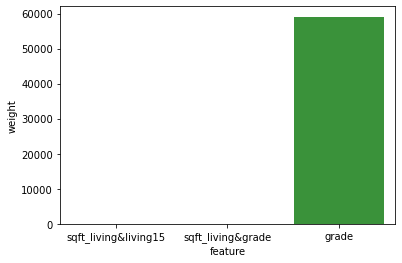

In [33]:
sns.barplot(x= model(top3_df, target)[2]["feature"], y= model(top3_df, target)[2]["weight"])

# Top 7 correlated

In [34]:
top7_df = df[[corrs.keys()[0], corrs.keys()[1], corrs.keys()[2], corrs.keys()[3], corrs.keys()[4], corrs.keys()[5], corrs.keys()[6]]]

In [35]:
model(top7_df, target, standard=True)[0:2]

(176326.54, 173843.05)

<AxesSubplot:xlabel='feature', ylabel='weight'>

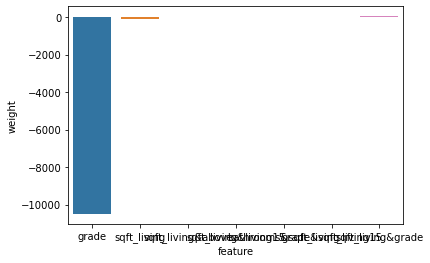

In [36]:
sns.barplot(x= model(top7_df, target)[2]["feature"], y= model(top7_df, target)[2]["weight"])

In [37]:
df.columns[0:22]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'long', 'sqft_living15',
       'sqft_lot15', 'age', 'listing_age', 'x0_98001.0', 'x0_98002.0',
       'x0_98003.0', 'x0_98004.0', 'x0_98005.0', 'x0_98006.0', 'x0_98007.0',
       'x0_98008.0'],
      dtype='object')

# All usable columns (zip code and cross multiplications added)

In [38]:
all_df = df.drop(['price', 'long', 'condition'],axis=1)

In [39]:
model(all_df, target, "minmax")[0:2]

(105109.38, 106598.63)

<AxesSubplot:xlabel='price', ylabel='Count'>

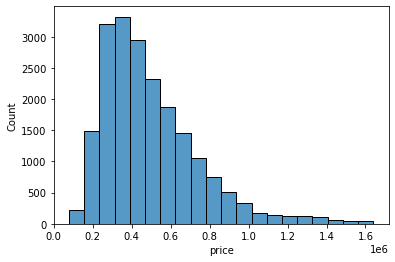

In [40]:
sns.histplot(df.price, bins=20)

In [41]:
logY = np.log(target)

In [42]:
model(all_df, logY)[2]

,feature,weight
4,floors,-0.039120
0,bedrooms,-0.013333
10,listing_age,-0.002577
87,grade&sqft_living15,-0.000017
8,sqft_lot15,-0.000001
...,...,...
64,x0_98119.0,7493.562917
59,x0_98112.0,7493.579864
58,x0_98109.0,7493.609972
14,x0_98004.0,7493.672789


<AxesSubplot:xlabel='feature', ylabel='weight'>

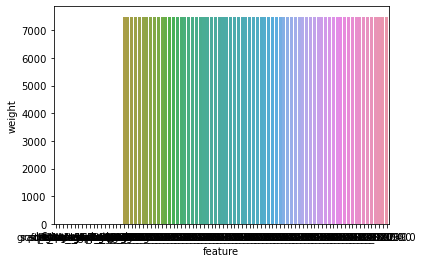

In [43]:
sns.barplot(x= model(all_df, logY)[2]["feature"], y= model(all_df, logY)[2]["weight"])

In [44]:
np.exp(.18)

1.1972173631218102

In [46]:
columns = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15','price']]

# Bottom of page. Run GUI loop

In [47]:
window = Tk()
window.title("my first")
window.configure(background="blue")

In [48]:
#create header label
Label (window, text="Enter the data:", bg="blue", fg="white", font="none 22 bold") .grid(row=0, column=0, columnspan=2, sticky=W)

In [49]:
#create input labels
input_labels = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_lot15', 'age', "zipcode"]
i=1
for item in input_labels:
    Label (window, text=item, bg="blue", fg="white", font="none 12 bold") .grid(row=i, column=0, sticky=W)
    i+=1

In [50]:
#create label entry boxes
sqft_living = Entry(window, width=20, bg="white")
sqft_living.grid(row=1, column=1, sticky=W)
grade = Entry(window, width=20, bg="white")
grade.grid(row=2, column=1, sticky=W)
sqft_above = Entry(window, width=20, bg="white")
sqft_above.grid(row=3, column=1, sticky=W)
sqft_living15 = Entry(window, width=20, bg="white")
sqft_living15.grid(row=4, column=1, sticky=W)
bathrooms = Entry(window, width=20, bg="white")
bathrooms.grid(row=5, column=1, sticky=W)
bedrooms = Entry(window, width=20, bg="white")
bedrooms.grid(row=6, column=1, sticky=W)
floors = Entry(window, width=20, bg="white")
floors.grid(row=7, column=1, sticky=W)
sqft_lot = Entry(window, width=20, bg="white")
sqft_lot.grid(row=8, column=1, sticky=W)
sqft_lot15 = Entry(window, width=20, bg="white")
sqft_lot15.grid(row=9, column=1, sticky=W)
age = Entry(window, width=20, bg="white")
age.grid(row=10, column=1, sticky=W)
zipcode = Entry(window, width=20, bg="white")
zipcode.grid(row=11, column=1, sticky=W)

In [51]:
#Add submit button
Button (window, text="SUBMIT", width=6, command=click) .grid(row=len(input_labels)+1,column=0, columnspan=2, sticky=W)

In [52]:
#Add another label
Label (window, text="Predicted Price:", bg="black", fg="white", font="none 20 bold") .grid(row=len(input_labels)+2, column=0,sticky=W)

In [53]:
#text output box
output = Text(window, width=75, height=6, wrap=WORD, background="white")
output.grid(row=len(input_labels)+3, column=0, columnspan=2, sticky=W)

In [54]:
#Run gui loop
window.mainloop()

In [55]:
data = ['13277', '7', '7', '7', '7', '8', '88', '9', '9', '', '9']
cols = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot15', 'sqft_lot', 'zipcode', 'age']
df = pd.DataFrame([data],columns=cols)
print(data)
df

['13277', '7', '7', '7', '7', '8', '88', '9', '9', '', '9']


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,bedrooms,floors,sqft_lot15,sqft_lot,zipcode,age
0,13277,7,7,7,7,8,88,9,9,,9
